## クラスタリング

## 指針  
・Califronia housingから緯度、経度、住宅価格(target)を用いてk-means  
・k-meansは外れ値に弱い傾向があるため、外れ値を除去  
・各変数はデータの規模が違うため標準化  
・クラスタリングの結果を基礎統計量、pairplot,violinplot,scatterplot,histplot,jointplot,積み上げヒストグラムなどクラスターごとにどのような特徴が見られるか

## 結果  


## 疑問・仮説  
・全特徴量を使ってクラスタリングは効果ある？  
・

In [1]:
import sklearn.datasets 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
#California Housing
california = sklearn.datasets.fetch_california_housing()
feature = california.data
target = california.target

In [6]:
df = pd.DataFrame(feature, columns=california.feature_names)
df['target'] = target

In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
#パーセンタイル点の獲得
df.quantile(q=[0.25,0.50,0.75])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0.25,2.56340,18.0,4.440716,1.006079,787.0,2.429741,33.93,-121.80,1.19600
0.50,3.53480,29.0,5.229129,1.048780,1166.0,2.818116,34.26,-118.49,1.79700
0.75,4.74325,37.0,6.052381,1.099526,1725.0,3.282261,37.71,-118.01,2.64725


In [14]:
#四分位範囲
iqr = df.quantile(0.75) - df.quantile(0.25)
#上側外れ値
upper_outlier = df.quantile(0.75) + iqr * 1.5
#下側外れ値
downer_outlier = df.quantile(0.25) - iqr * 1.5

In [15]:
df.min()

MedInc          0.499900
HouseAge        1.000000
AveRooms        0.846154
AveBedrms       0.333333
Population      3.000000
AveOccup        0.692308
Latitude       32.540000
Longitude    -124.350000
target          0.149990
dtype: float64

In [17]:
upper_outlier

MedInc           8.013025
HouseAge        65.500000
AveRooms         8.469878
AveBedrms        1.239697
Population    3132.000000
AveOccup         4.561041
Latitude        43.380000
Longitude     -112.325000
target           4.824125
dtype: float64

In [28]:
#1…上側外れ値よりも大きい値を抽出
a = df[~(df >= upper_outlier)].dropna()
a

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [31]:
#2…下側外れ値よりも小さい値を抽出
b = df[~(df<=downer_outlier)].dropna()
b

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [33]:
#3…二つの条件を満たす行を抽出
df_2 = df[~(df<=downer_outlier) & ~(df>=upper_outlier)].dropna()
df_2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


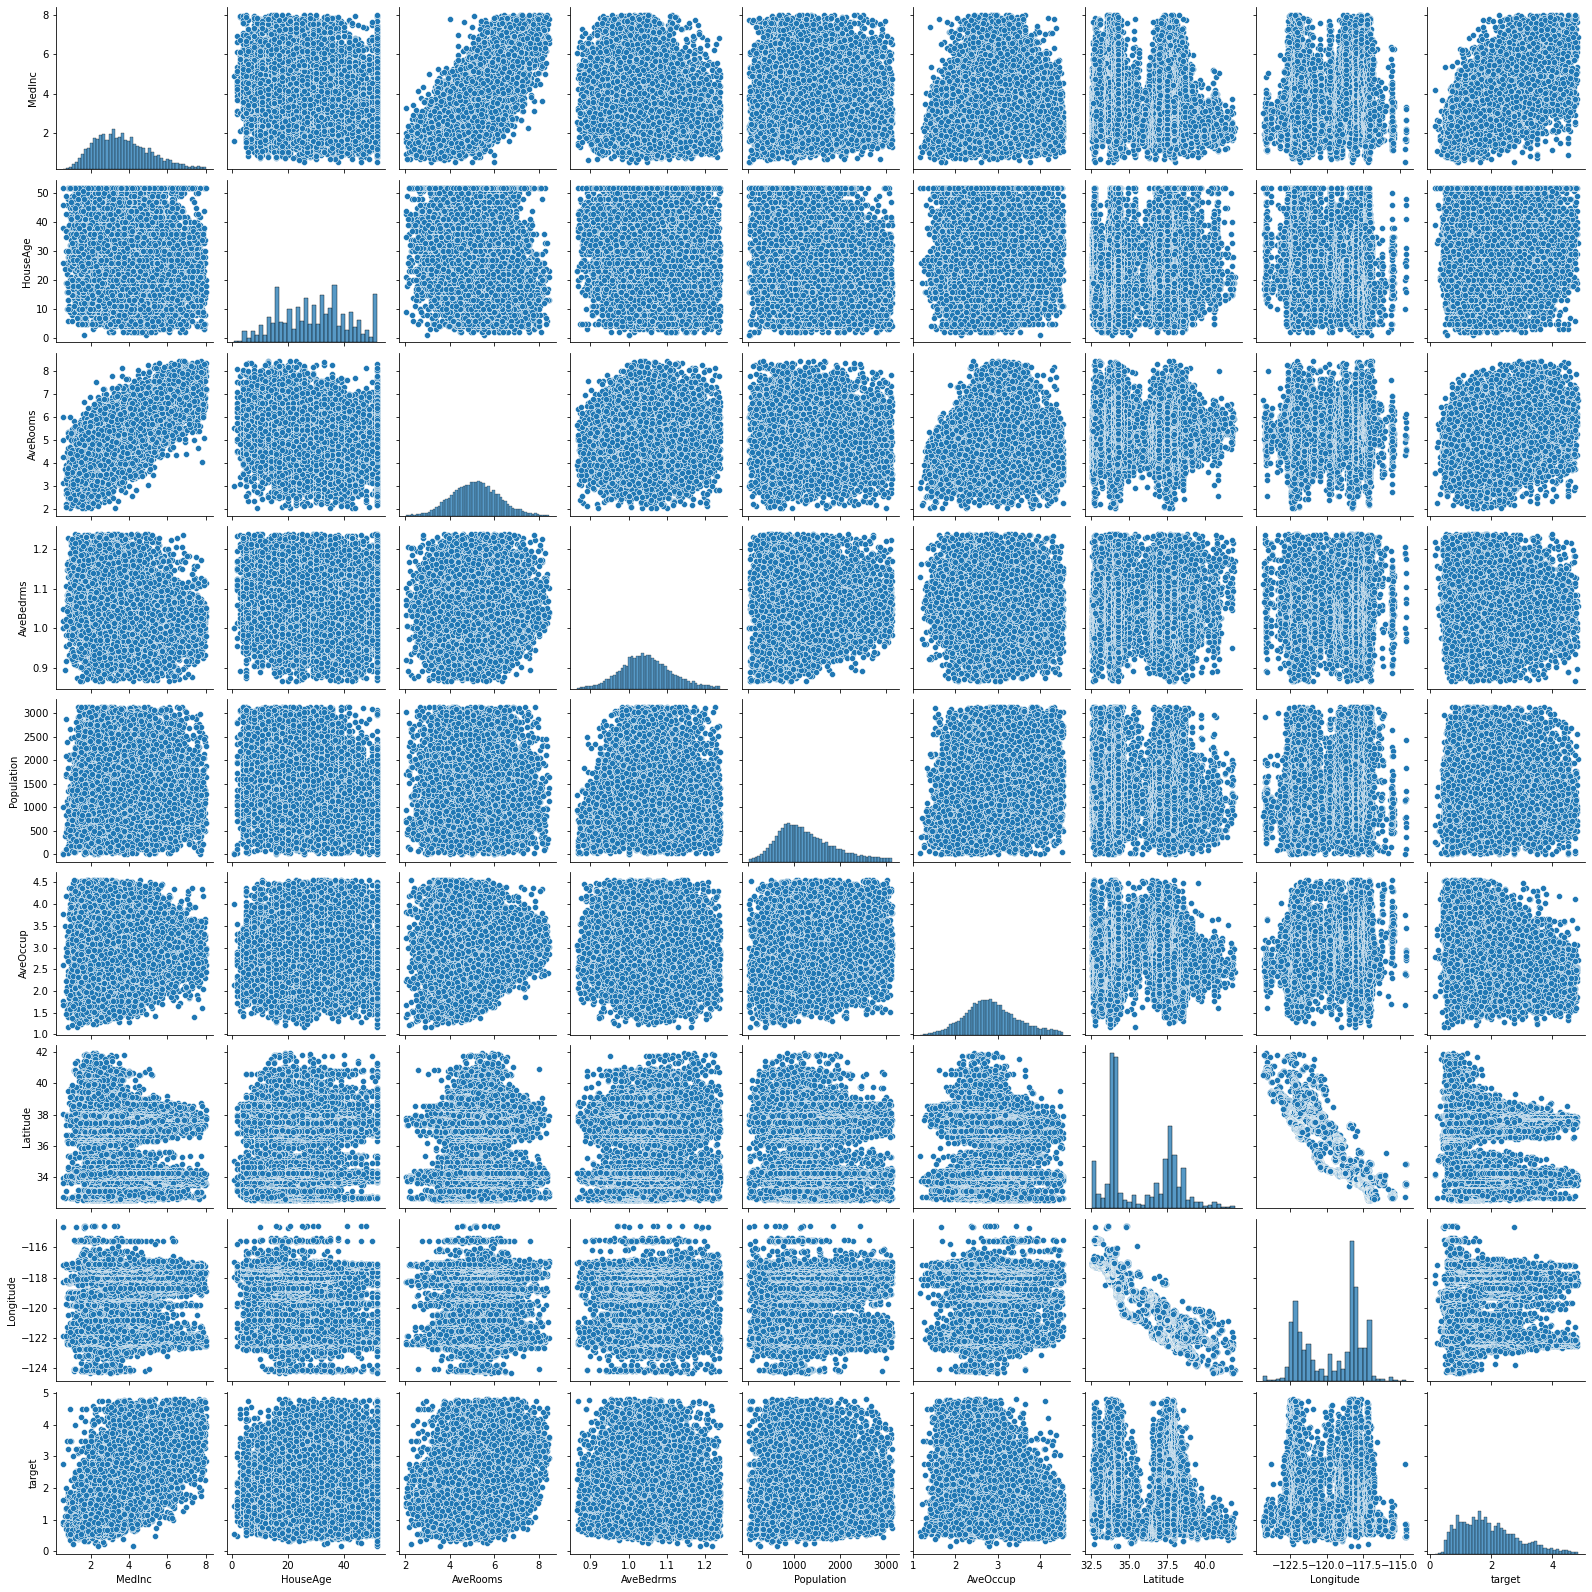

In [34]:
#分布を確認
sns.pairplot(df_2)

<AxesSubplot:>

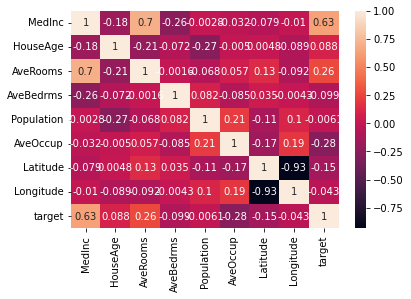

In [35]:
#相関も確認
sns.heatmap(df_2.corr(), annot=True)

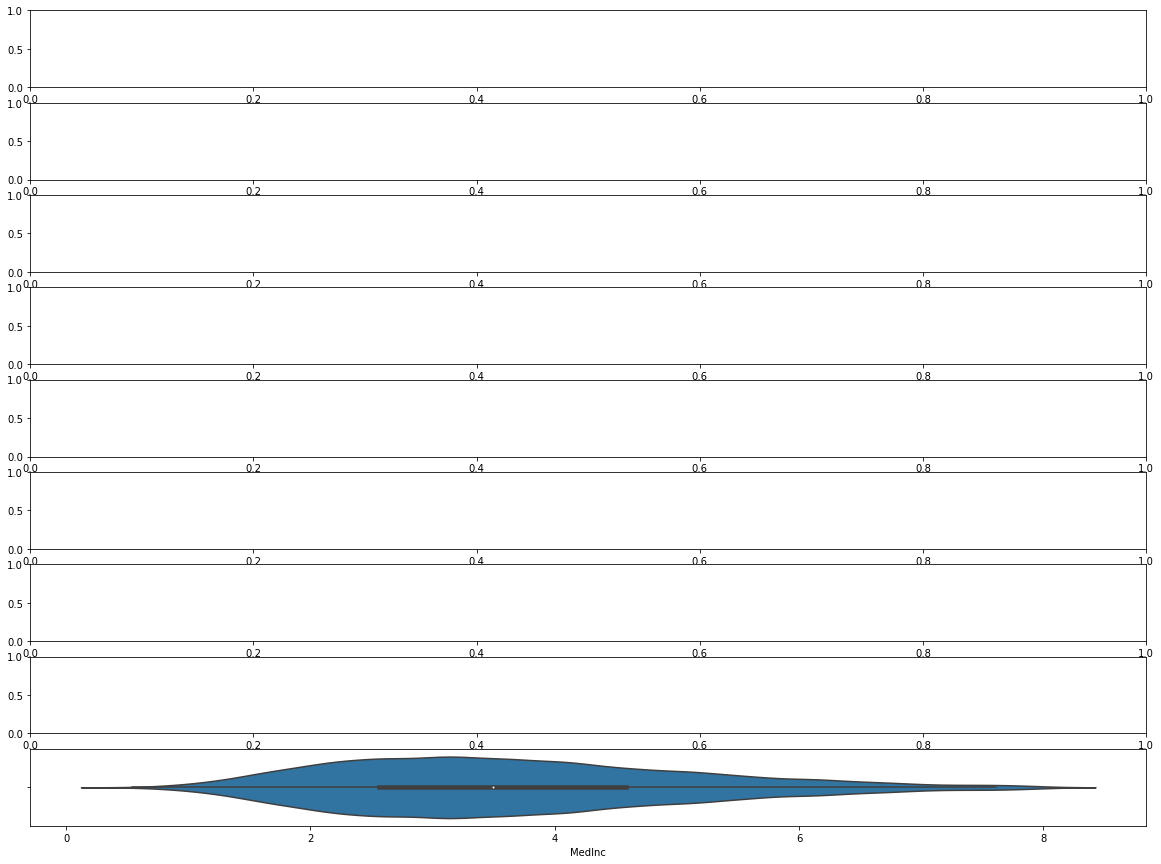

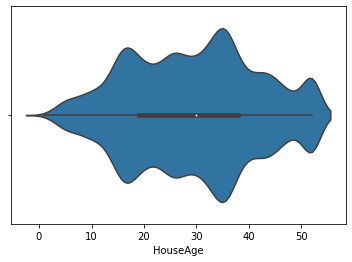

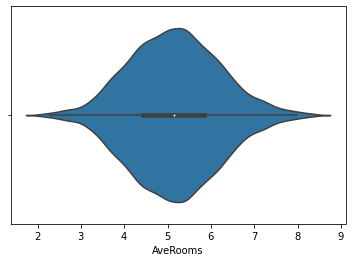

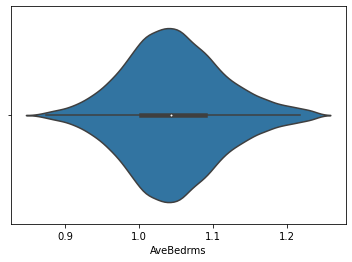

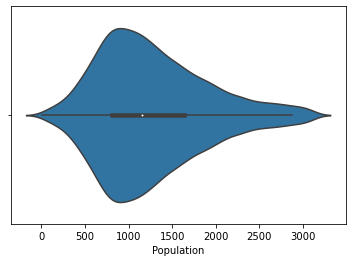

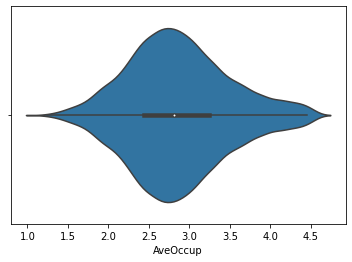

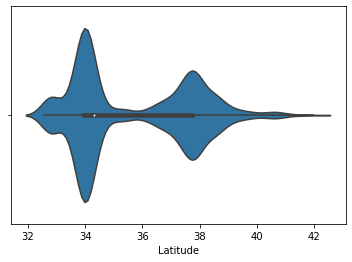

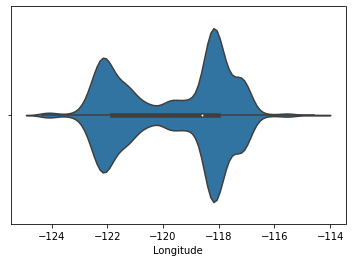

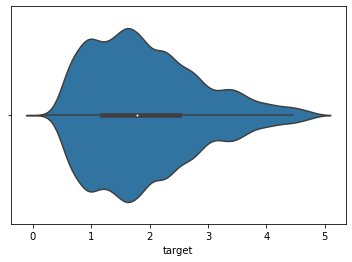

In [37]:
#バイオリンプロットで分布を軽く確認
num_list=list(df_2.columns)
fig, ax = plt.subplots(9,1, figsize=(20, 15))
for i in range(0, 9):
    ax[i]=sns.violinplot(x=df_2[num_list[i]])
    plt.show()

### k-means法  
使う特徴量  
・緯度、経度、住宅価格

In [39]:
#特徴量作成
x_1 = df_2.loc[:,'Latitude':'target']
x_1

,Latitude,Longitude,target
2,37.85,-122.24,3.521
3,37.85,-122.25,3.413
4,37.85,-122.25,3.422
5,37.85,-122.25,2.697
6,37.84,-122.25,2.992
...,...,...,...
20634,39.27,-121.56,1.168
20635,39.48,-121.09,0.781
20637,39.43,-121.22,0.923
20638,39.43,-121.32,0.847


In [41]:
#標準化
ss=StandardScaler()
x_1_std = ss.fit_transform(x_1)

In [57]:
(x_1_std == float('inf')).sum()

0

In [63]:
x_1_std.shape

(16310, 3)

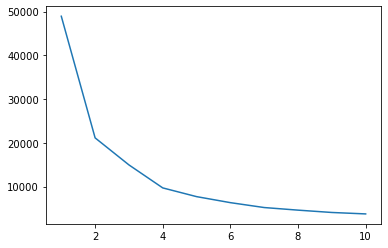

In [64]:
#エルボー図
#クラスター数4か6あたりでinertiaが急激に減っているのが分かる
inertia = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(x_1_std)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertia)
plt.show()

In [69]:
#n_clusters=4でクラスタリング
km=KMeans(n_clusters=4)
km.fit(x_1_std)
cluster_kmeans_4 = km.predict(x_1_std)

In [70]:
#クラスタ内誤差平方和も計算
km.inertia_

9702.852113863271

In [107]:
#データフレームに格納し、各クラスターの基礎統計量がどうなっているか確認
df_cluster = pd.DataFrame(x_1)
df_cluster['cluster_kmeans_4'] = cluster_kmeans_4
df_cluster

,Latitude,Longitude,target,cluster_kmeans_4
2,37.85,-122.24,3.521,2
3,37.85,-122.25,3.413,2
4,37.85,-122.25,3.422,2
5,37.85,-122.25,2.697,2
6,37.84,-122.25,2.992,2
...,...,...,...,...
20634,39.27,-121.56,1.168,1
20635,39.48,-121.09,0.781,1
20637,39.43,-121.22,0.923,1
20638,39.43,-121.32,0.847,1


In [108]:
#基礎統計量
#これだけでは何も分からないのでクラスターごとに分けて基礎統計量
df_cluster.describe()

,Latitude,Longitude,target,cluster_kmeans_4
count,16310.000000,16310.000000,16310.000000,16310.000000
mean,35.671166,-119.627198,1.927417,1.133906
std,2.140660,1.995115,0.943901,1.110421
min,32.540000,-124.350000,0.149990,0.000000
25%,33.940000,-121.820000,1.185000,0.000000
50%,34.290000,-118.610000,1.775000,1.000000
75%,37.730000,-118.030000,2.494000,2.000000
max,41.950000,-114.570000,4.822000,3.000000


In [109]:
#クラスターごとに各特徴量の基礎統計量を算出
#なにか気づく点は？
print(df_cluster[df_cluster['cluster_kmeans_4'] == 0].describe())
print(df_cluster[df_cluster['cluster_kmeans_4'] == 1].describe())
print(df_cluster[df_cluster['cluster_kmeans_4'] == 2].describe())
print(df_cluster[df_cluster['cluster_kmeans_4'] == 3].describe())

          Latitude    Longitude       target  cluster_kmeans_4
count  6226.000000  6226.000000  6226.000000            6226.0
mean     33.904757  -117.918900     1.518976               0.0
std       0.665641     0.754609     0.465057               0.0
min      32.540000  -120.660000     0.149990               0.0
25%      33.780000  -118.280000     1.161250               0.0
50%      33.970000  -118.030000     1.577500               0.0
75%      34.110000  -117.320000     1.878000               0.0
max      37.350000  -114.570000     2.328000               0.0
          Latitude    Longitude       target  cluster_kmeans_4
count  4557.000000  4557.000000  4557.000000            4557.0
mean     38.090252  -121.411600     1.179153               1.0
std       1.127751     1.051393     0.431723               0.0
min      34.910000  -124.350000     0.225000               1.0
25%      37.420000  -122.150000     0.824000               1.0
50%      37.970000  -121.450000     1.125000           

### 可視化(主にseaborn)  
https://self-methods.com/seaborn-graph-howtouse/#index_id27

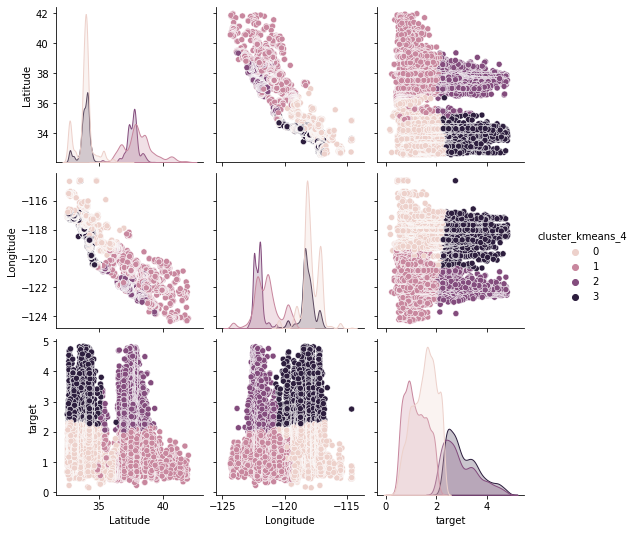

In [124]:
#クラスターごとにカテゴリ分けしてpairplot
#df_cluster['cluster_kmeans_4']=df_cluster['cluster_kmeans_4'].astype('str')
sns.pairplot(data=df_cluster, hue='cluster_kmeans_4')

In [125]:
#violinplot

##### クラスター０の特徴  
・東寄り
・南寄り
・カリフォルニア州東南部
・住宅価格は安め
##### クラスター１の特徴  
・割と西寄り
・割と北より
・カリフォルニア州北部内陸側
・住宅価格は低め（クラスター0よりも低そう）
##### クラスター２の特徴  
・割と西より
・割と北より
・カリフォルニア州北西沿岸部
・住宅価格は高め
##### クラスター３の特徴  
・割と東寄り
・南寄り
・カリフォルニア州南東沿岸部
・住宅価格は高め

### pairplotを個別で見るには以下の図

<AxesSubplot:xlabel='target', ylabel='Count'>

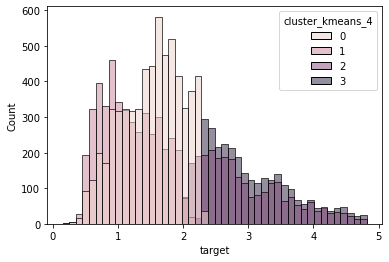

In [117]:
#targetのヒストグラム
sns.histplot(x=df_cluster['target'], hue=df_cluster['cluster_kmeans_4'])

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

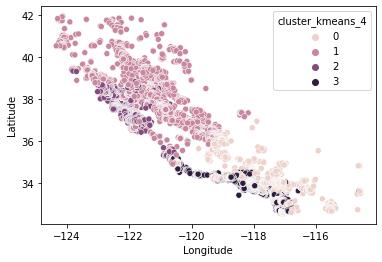

In [120]:
#緯度と経度の散布図
sns.scatterplot(x='Longitude', y='Latitude', data=df_cluster, hue='cluster_kmeans_4')

In [71]:
#n_clusters=5でクラスタリング
km_2 = KMeans(n_clusters=5)
km_2.fit(x_1_std)
cluster_kmeans_5 = km_2.predict(x_1_std)